### Import necessary modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df = vv.dataset_modelling_version(iteration_code="0013_20220704")
print(df.shape)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:283: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 29545/39270/33527/33990 ==> 29545/29764/29559/29567
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley', 'borough_name_Brent',
       'borough_name_Bromley', 'borough_name_Camden',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Hackney', 'borough_name_Hammersmith and Fulham',
       'borough_name_Haringey', 'borough_name_Harrow', 'borough_name_Havering',
       'borough_name_Hillingdon', 'borough_name_Hounslow',
       'borough_name_Islington', 'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_London (all)',
 

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121666838,470000.0,51.421556,-0.085360,0.2,3.0,1.0,14.0,20220329.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124352288,435000.0,51.333260,-0.136320,0.5,2.0,2.0,6.0,20220627.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
124442261,435000.0,51.333260,-0.136320,0.5,2.0,2.0,5.0,20220628.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
123088685,440000.0,51.377899,-0.091704,0.2,2.0,2.0,19.0,20220505.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
121267037,440000.0,51.379063,-0.042351,1.0,3.0,2.0,10.0,20220318.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123518627,440000.0,51.369100,-0.083860,0.4,2.0,2.0,8.0,20220520.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
124486775,440000.0,51.377420,-0.093470,0.2,2.0,2.0,11.0,20220629.0,9.0,0,...,0,0,0,0,0,0,0,0,1,0
122757659,440000.0,51.394844,-0.069912,0.3,2.0,1.0,13.0,20220425.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
98753948,440000.0,51.377831,-0.091873,0.2,2.0,2.0,13.0,20201021.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0


### Get the property listings data and store in a dataframe

In [4]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
80138421,425000.0,51.376435,-0.084635,0.1,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
120474053,435000.0,51.334831,-0.118817,0.3,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
96576997,400000.0,51.343284,-0.139142,1.0,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124004333,400000.0,51.505680,-0.335640,0.4,NaN,1.0,15.0,20220617.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
122145023,375000.0,51.511062,-0.319344,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0
122146472,375000.0,51.511020,-0.319358,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
122018636,350000.0,51.507730,-0.303430,0.5,NaN,1.0,7.0,20220406.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
85381386,365000.0,51.505340,-0.263075,0.2,NaN,1.0,5.0,20220531.0,4.0,0,...,0,0,0,1,0,0,0,0,0,1
121986209,600000.0,51.519830,-0.090230,0.1,NaN,1.0,10.0,20220405.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
median_bathroom = df['bathrooms_model'].median()
df['bathrooms_model'].fillna(median_bathroom, inplace=True)
median_bedrooms = df['bedrooms_model'].median()
df['bedrooms_model'].fillna(median_bedrooms, inplace=True)
median_imageCount = df['analyticsProperty.imageCount'].median()
df['analyticsProperty.imageCount'].fillna(median_imageCount, inplace=True)
median_added = df['analyticsProperty.added'].median()
df['analyticsProperty.added'].fillna(median_added, inplace=True)

sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
print(len(sample_incomplete_rows))
sample_incomplete_rows


0


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [11]:
# df = df.dropna(subset="Price")
# df = df.dropna(subset=["analyticsProperty.added", 'location.latitude', 'location.longitude'])
df.isnull().any() == True

Price                                                 False
location.latitude                                     False
location.longitude                                    False
distance_to_any_train                                 False
bedrooms_model                                        False
bathrooms_model                                       False
analyticsProperty.imageCount                          False
analyticsProperty.added                               False
floorplan_count                                       False
borough_name_Barking and Dagenham                     False
borough_name_Barnet                                   False
borough_name_Bexley                                   False
borough_name_Brent                                    False
borough_name_Bromley                                  False
borough_name_Camden                                   False
borough_name_City of London                           False
borough_name_Croydon                    

## Prepare data for training the model

In [12]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
## Build a Random Forest model

In [14]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Evaluate the model on the test data

In [15]:
print(type(y_test.values))
print(type(y_pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
metrics.mean_squared_error(y_test.values, y_pred)

9914368465.234411

##

In [17]:
#metrics.accuracy_score(y_test.values, y_pred)
regressor.score(X_test, y_test)
#regressor.score(X, y)

0.2801796526409608

In [18]:
sorted(zip(y_test,y_pred),reverse=True)

[(600000.0, 557000.0),
 (600000.0, 555000.0),
 (600000.0, 539000.0),
 (600000.0, 529990.0),
 (600000.0, 525989.0),
 (600000.0, 524990.0),
 (600000.0, 516990.0),
 (600000.0, 510000.0),
 (600000.0, 509000.0),
 (600000.0, 505000.0),
 (600000.0, 503000.0),
 (600000.0, 495989.0),
 (600000.0, 490000.0),
 (600000.0, 490000.0),
 (600000.0, 489999.0),
 (600000.0, 485000.0),
 (600000.0, 480000.0),
 (600000.0, 479990.0),
 (600000.0, 477000.0),
 (600000.0, 474000.0),
 (600000.0, 474000.0),
 (600000.0, 473000.0),
 (600000.0, 473000.0),
 (600000.0, 471000.0),
 (600000.0, 470000.0),
 (600000.0, 470000.0),
 (600000.0, 465000.0),
 (600000.0, 460000.0),
 (600000.0, 456999.0),
 (600000.0, 441000.0),
 (600000.0, 438000.0),
 (600000.0, 434000.0),
 (600000.0, 423000.0),
 (600000.0, 414000.0),
 (600000.0, 401000.0),
 (600000.0, 392375.0),
 (600000.0, 390999.8),
 (600000.0, 362000.0),
 (600000.0, 362000.0),
 (600000.0, 355999.0),
 (600000.0, 349990.0),
 (600000.0, 340989.0),
 (600000.0, 278000.0),
 (599999.0,

In [19]:
y_pred = regressor.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,600000.0,557000.0
1,600000.0,555000.0
2,600000.0,539000.0
3,600000.0,529990.0
4,600000.0,525989.0
5,600000.0,524990.0
6,600000.0,516990.0
7,600000.0,510000.0
8,600000.0,509000.0
9,600000.0,505000.0


In [20]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

9914368465.234411

<AxesSubplot:xlabel='actual', ylabel='predicted'>

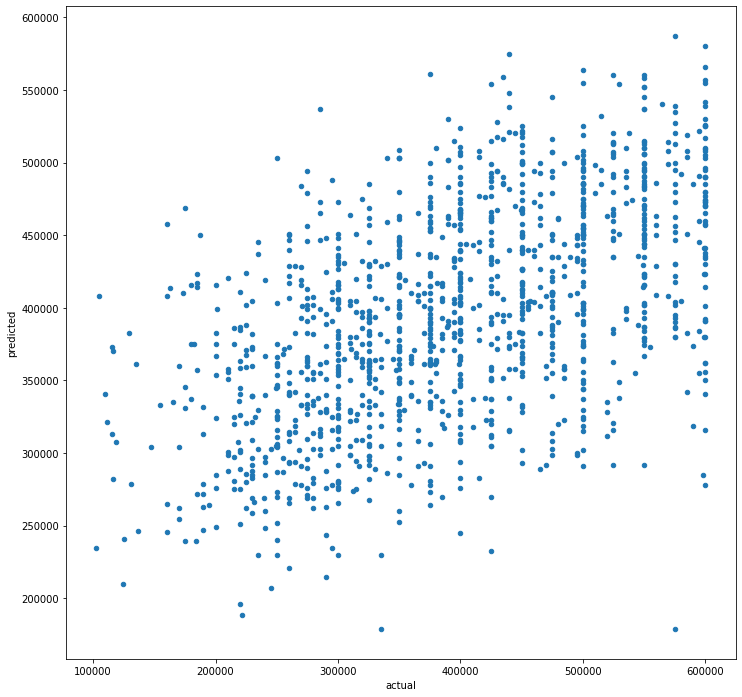

In [21]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))